In [3]:
!pip install pandas

In [4]:
import pandas as pd

In [5]:
data = [1,2,3,4]
s = pd.Series(data)
print(s)

0    1
1    2
2    3
3    4
dtype: int64


In [6]:
s = pd.Series(data,index=["a","b","c","d"])
print(s)


a    1
b    2
c    3
d    4
dtype: int64


In [7]:
data = {'Name':['Alice','Bob','Charlie'],'Age' : [25,36,56]}
df = pd.DataFrame(data)
print(df)

      Name  Age
0    Alice   25
1      Bob   36
2  Charlie   56


In [8]:
print(df['Name'])

0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object


In [10]:
print(df[['Name','Age']])

      Name  Age
0    Alice   25
1      Bob   36
2  Charlie   56


In [11]:
print(df.loc[0])

Name    Alice
Age        25
Name: 0, dtype: object


In [14]:
print(df.iloc[2])

Name    Charlie
Age          56
Name: 2, dtype: object


In [17]:
print(df[0:2])

    Name  Age
0  Alice   25
1    Bob   36


In [20]:
print(df[['Age']])

   Age
0   25
1   36
2   56


In [21]:
df.isnull()

,Name,Age
0,False,False
1,False,False
2,False,False


In [22]:
df.dropna()

,Name,Age
0,Alice,25
1,Bob,36
2,Charlie,56


In [24]:
df.fillna(value = 0)

,Name,Age
0,Alice,25
1,Bob,36
2,Charlie,56


In [25]:
df.rename(columns={'Name':"Full Name"})

,Full Name,Age
0,Alice,25
1,Bob,36
2,Charlie,56


In [26]:
df['Age'] = df['Age'].apply(lambda x:x+1)
print(df)

      Name  Age
0    Alice   26
1      Bob   37
2  Charlie   57


In [27]:
df_grouped = df.groupby('Name')['Age'].sum()
print(df_grouped)

Name
Alice      26
Bob        37
Charlie    57
Name: Age, dtype: int64


In [28]:
print(df['Age'].mean())

40.0


In [29]:
print(df['Age'].sum())

120


In [30]:
df1 = pd.DataFrame({"ID":[1,2,3],"Name":['Alice','Bob','Charlie']})
df2 = pd.DataFrame({"ID" : [1,2,3],"Age":[25,30,35]})
merged_df = pd.merge(df1,df2, on="ID")
print(merged_df)

   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35


In [34]:
df3 = pd.DataFrame({"Name":['David'],"Age": [40]})
concated_df = pd.concat([df,df3],ignore_index=True)
print(concated_df)

      Name  Age
0    Alice   26
1      Bob   37
2  Charlie   57
3    David   40


In [35]:
pivot_df = df.pivot_table(values='Age',index='Name',aggfunc='mean')
print(pivot_df)

          Age
Name         
Alice    26.0
Bob      37.0
Charlie  57.0


In [40]:
df.columns = df.columns.str.strip()

In [41]:
df['Date'] = pd.to_datetime('2024-12-01')
print(df)

      Name  Age       Date
0    Alice   26 2024-12-01
1      Bob   37 2024-12-01
2  Charlie   57 2024-12-01


In [42]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year


In [43]:
df['Year']

,Year
0,2024
1,2024
2,2024


In [47]:
import matplotlib.pyplot as plt

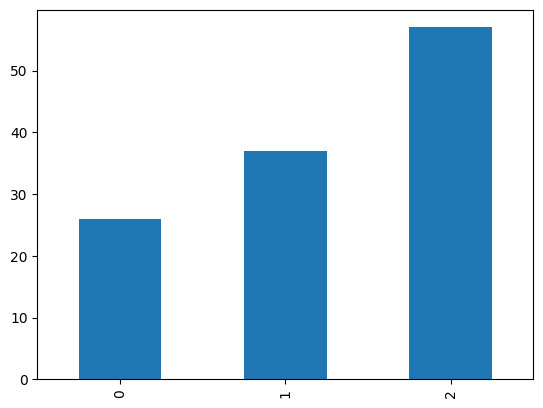

In [53]:
df['Age'].plot(kind='bar')
plt.show()

In [54]:
df['Date'] = pd.date_range(start='2024-01-01', periods=len(df), freq='D')
print(df)


      Name  Age       Date  Year
0    Alice   26 2024-01-01  2024
1      Bob   37 2024-01-02  2024
2  Charlie   57 2024-01-03  2024


In [55]:
import pandas as pd

In [56]:
data = {'Name': ['Alice','Bob','Charlie',None],'Age':[23,None,34,56]}
df = pd.DataFrame(data)
print(df.isna())

    Name    Age
0  False  False
1  False   True
2  False  False
3   True  False


In [57]:
print(df.isnull())

    Name    Age
0  False  False
1  False   True
2  False  False
3   True  False


In [58]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
print(df)

      Name        Age
0    Alice  23.000000
1      Bob  37.666667
2  Charlie  34.000000
3     None  56.000000


In [59]:
df_cleaned = df.dropna()
print(df_cleaned)

      Name        Age
0    Alice  23.000000
1      Bob  37.666667
2  Charlie  34.000000


In [60]:
df['Name'] = df['Name'].str.upper()
print(df)

      Name        Age
0    ALICE  23.000000
1      BOB  37.666667
2  CHARLIE  34.000000
3     None  56.000000


In [63]:
df['FirstLetter'] = df['Name'].str.extract(r'(\w)',expand=False)
print(df)

      Name        Age FirstLetter
0    ALICE  23.000000           A
1      BOB  37.666667           B
2  CHARLIE  34.000000           C
3     None  56.000000        None


In [67]:
def categorized_age(age):
    if age < 35:
        return 'Minor'
    elif age < 65:
        return 'Adult'
    else:
        return 'Senior'

df['AgeCategory'] = df['Age'].apply(categorized_age)
print(df)

      Name        Age FirstLetter AgeCategory
0    ALICE  23.000000           A       Minor
1      BOB  37.666667           B       Adult
2  CHARLIE  34.000000           C       Minor
3     None  56.000000        None       Adult


In [71]:
df2 = df.map(lambda x:x*2 if isinstance(x,(int,float)) else x)
print(df2)

      Name         Age FirstLetter AgeCategory
0    ALICE   46.000000           A       Minor
1      BOB   75.333333           B       Adult
2  CHARLIE   68.000000           C       Minor
3     None  112.000000        None       Adult


In [69]:
grouped = df.groupby('AgeCategory')['Age'].mean()
print(grouped)

AgeCategory
Adult    46.833333
Minor    28.500000
Name: Age, dtype: float64


In [72]:
grouped = df.groupby('AgeCategory').agg({'Age':['mean','sum']})
print(grouped)

                   Age           
                  mean        sum
AgeCategory                      
Adult        46.833333  93.666667
Minor        28.500000  57.000000


In [73]:
data = {'City': ['New York', 'Los Angeles', 'New York', 'Los Angeles'],
        'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 35, 40]}

df = pd.DataFrame(data)

pivot_table = df.pivot_table(values='Age', index='City', aggfunc='mean')
print(pivot_table)


              Age
City             
Los Angeles  35.0
New York     30.0


In [74]:
data = {'Name': ['Alice', 'Bob'], 'Math': [90, 85], 'Science': [80, 70]}
df = pd.DataFrame(data)

melted_df = pd.melt(df, id_vars=['Name'], value_vars=['Math', 'Science'])
print(melted_df)


    Name variable  value
0  Alice     Math     90
1    Bob     Math     85
2  Alice  Science     80
3    Bob  Science     70


In [75]:
stacked_df = df.set_index('Name').stack()
print(stacked_df)

Name          
Alice  Math       90
       Science    80
Bob    Math       85
       Science    70
dtype: int64


In [82]:
arrays = [['A','A','B','C'],['one','two','one','Three']]
index = pd.MultiIndex.from_arrays(arrays,names = ['Letter','Number'])
df = pd.DataFrame({1,2,3,4},index=index)
print(df)

               0
Letter Number   
A      one     1
       two     2
B      one     3
C      Three   4


In [83]:
for chunk in pd.read_csv('large_file.csv', chunksize=1000):
    print(chunk)


FileNotFoundError: [Errno 2] No such file or directory: 'large_file.csv'

In [84]:
df = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'B', 'A'],
    'Value1': [10, 20, 30, 40, 50],
    'Value2': [5, 10, 15, 20, 25]
})

result = df.groupby('Category').agg({
    'Value1': ['mean', 'sum'],
    'Value2': 'max'
})
print(result)


         Value1     Value2
           mean sum    max
Category                  
A          30.0  90     25
B          30.0  60     20


In [88]:
df = pd.DataFrame({'Value':[10,20,30,40,50]})
rolling_mean = df['Value'].rolling(window=3).mean()
print(rolling_mean)

0     NaN
1     NaN
2    20.0
3    30.0
4    40.0
Name: Value, dtype: float64


In [90]:
ewm_mean = df['Value'].ewm(span=3).sum()
print(ewm_mean)

0    10.000
1    25.000
2    42.500
3    61.250
4    80.625
Name: Value, dtype: float64


In [92]:
df['EWM_alpha'] = df['Value'].ewm(alpha=0.1).mean()


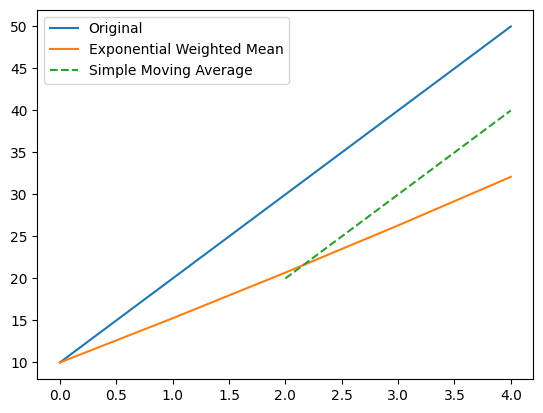

In [94]:
import matplotlib.pyplot as plt

df['SMA'] = df['Value'].rolling(window=3).mean()

plt.plot(df['Value'], label='Original')
plt.plot(df['EWM_alpha'], label='Exponential Weighted Mean')
plt.plot(df['SMA'], label='Simple Moving Average', linestyle='--')
plt.legend()
plt.show()


In [95]:
df1 = pd.DataFrame({'key': ['A', 'B', 'C'], 'Value1': [1, 2, 3]})
df2 = pd.DataFrame({'key': ['B', 'C', 'D'], 'Value2': [4, 5, 6]})

merged_df = pd.merge(df1, df2, on='key', how='inner')
print(merged_df)


  key  Value1  Value2
0   B       2       4
1   C       3       5


In [96]:
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

concat_df = pd.concat([df1, df2], ignore_index=True)
print(concat_df)


   A  B
0  1  3
1  2  4
2  5  7
3  6  8


In [97]:
df = pd.DataFrame({
    'Date': ['2021-01-01', '2021-01-02', '2021-01-01', '2021-01-02'],
    'Category': ['A', 'A', 'B', 'B'],
    'Sales': [100, 200, 150, 250]
})

pivot_df = df.pivot_table(values='Sales', index='Date', columns='Category', aggfunc='sum')
print(pivot_df)


Category      A    B
Date                
2021-01-01  100  150
2021-01-02  200  250


In [99]:
df = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'C', 'B', 'C']
})

df['Category'] = df['Category'].astype('category')
print(df.dtypes)


Category    category
dtype: object


In [103]:
date_range = pd.date_range(start='2021-01-01', periods=5, freq='D')
df = pd.DataFrame({'Date': date_range, 'Value': [10, 20, 30, 40, 50]})
df.set_index('Date', inplace=True)

# Resample data to monthly frequency, taking the sum
monthly_resample = df.resample('ME').sum()
print(monthly_resample)


            Value
Date             
2021-01-31    150
